In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
import xgboost as xgb

In [121]:
train=pd.read_excel("Training-Data-Sets.xlsx",sheet_name="NEWDATA")

In [11]:
train.head(5)

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 39 columns):
Day                                   12000 non-null int64
EQ                                    12000 non-null float64
Social_Search_Impressions             12000 non-null int64
Social_Search_Working_cost            12000 non-null int64
Digital_Impressions                   12000 non-null int64
Digital_Working_cost                  12000 non-null int64
Print_Impressions.Ads40               12000 non-null int64
Print_Working_Cost.Ads50              12000 non-null int64
OOH_Impressions                       12000 non-null int64
OOH_Working_Cost                      12000 non-null int64
SOS_pct                               12000 non-null int64
Digital_Impressions_pct               12000 non-null int64
CCFOT                                 12000 non-null int64
Median_Temp                           12000 non-null int64
Median_Rainfall                       12000 non-null float64
Fu

# Data Preprocessing

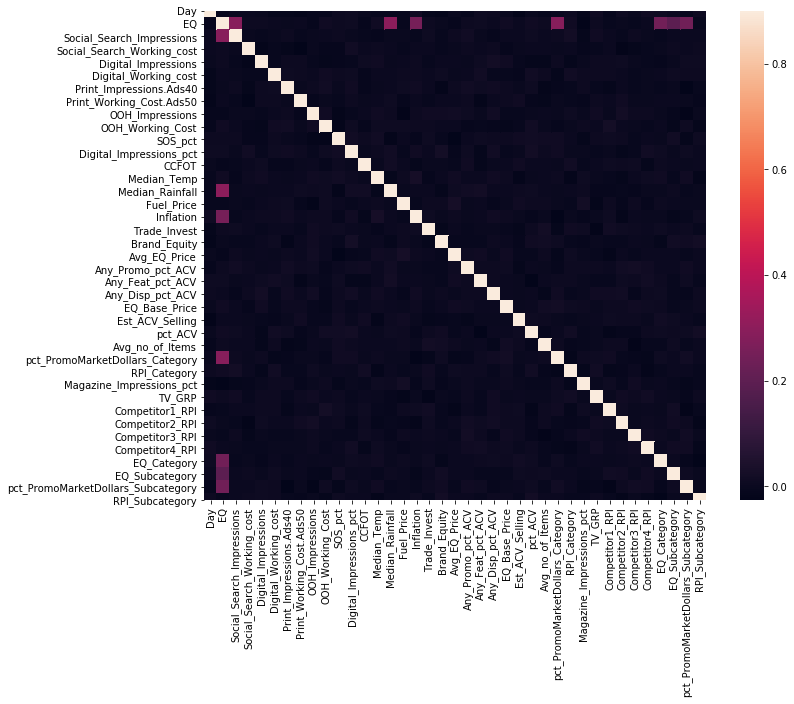

In [13]:
corr=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

### Ploting the graphs of features with respect to dependent variable to find if there are any outliers

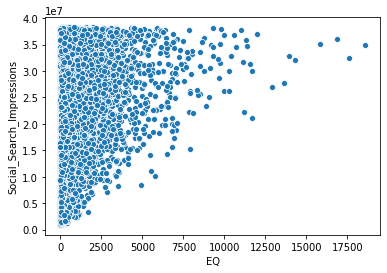

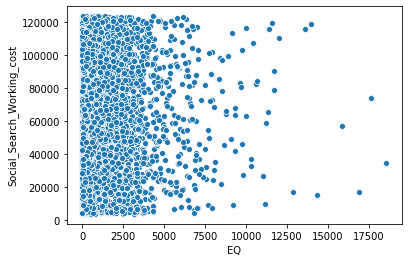

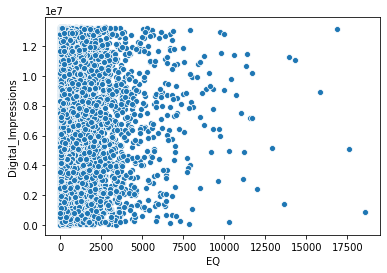

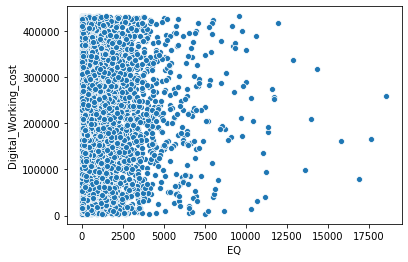

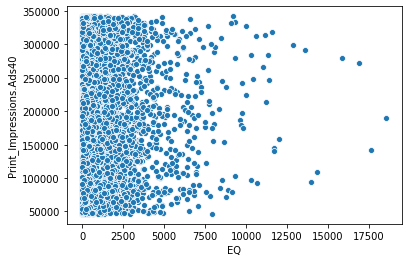

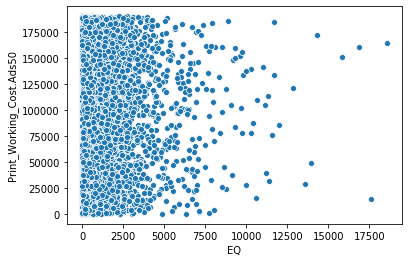

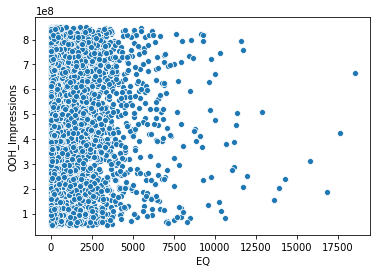

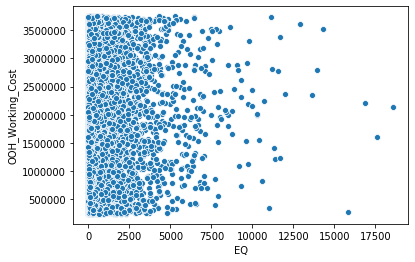

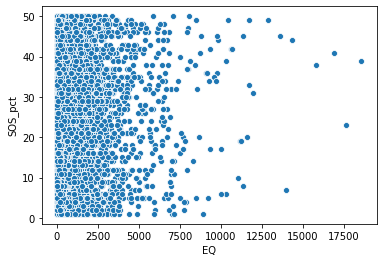

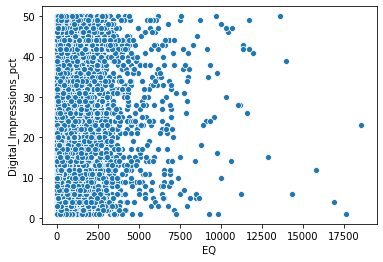

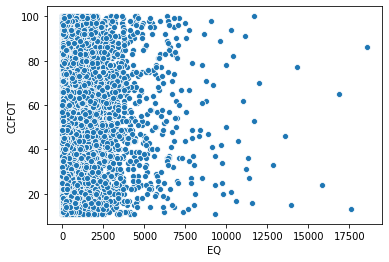

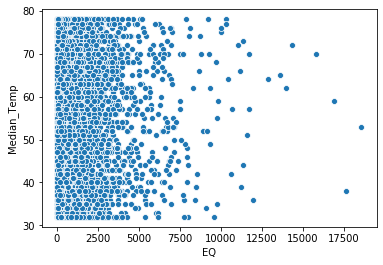

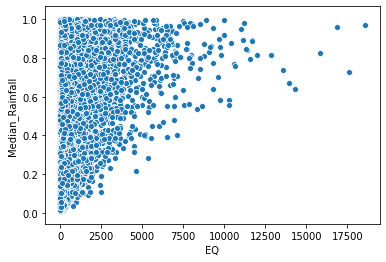

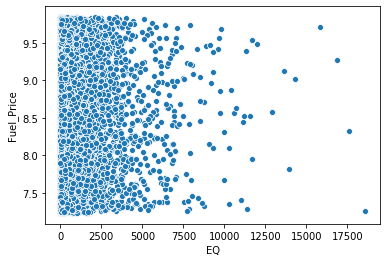

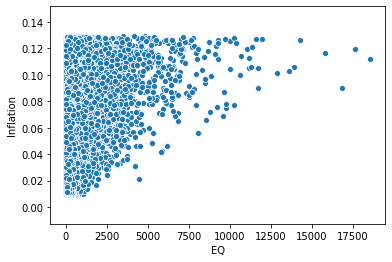

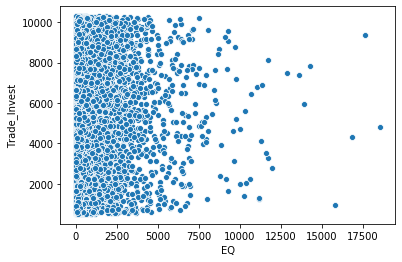

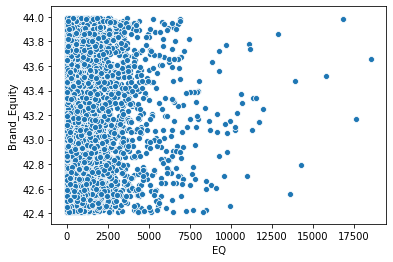

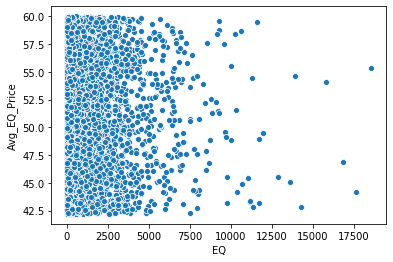

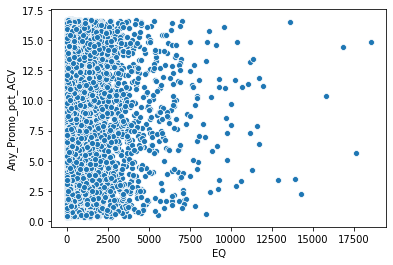

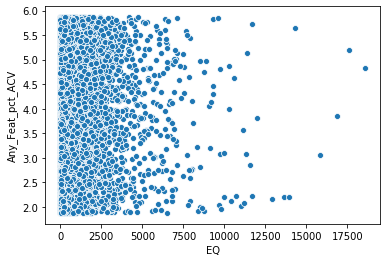

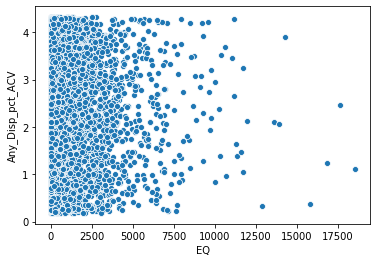

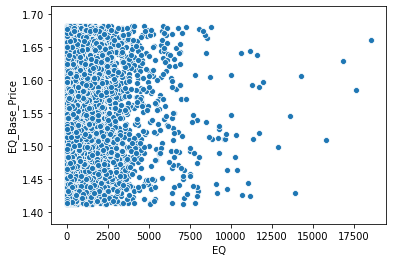

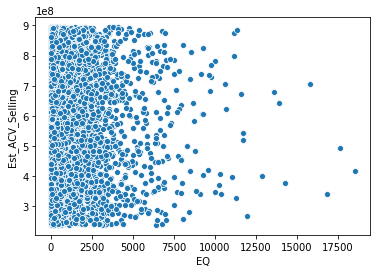

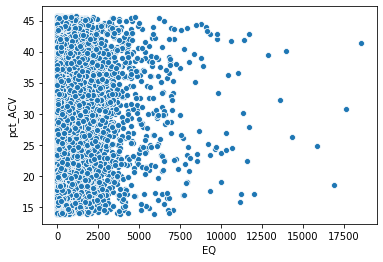

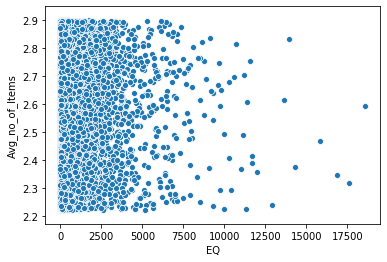

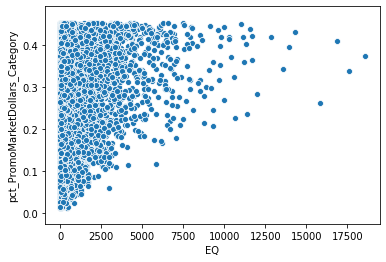

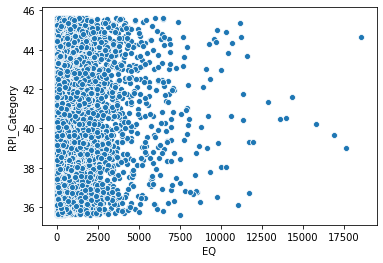

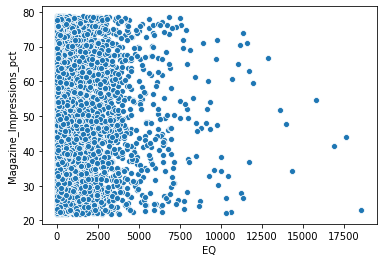

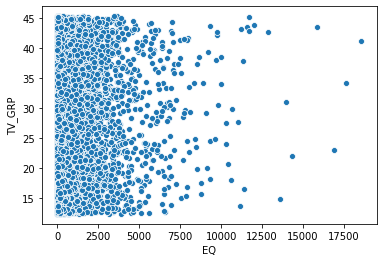

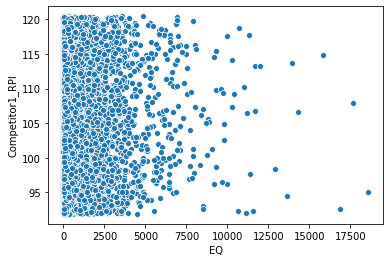

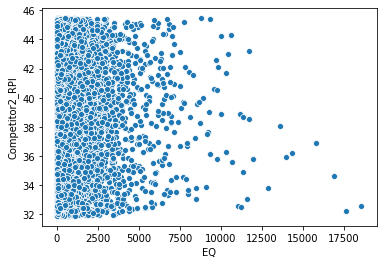

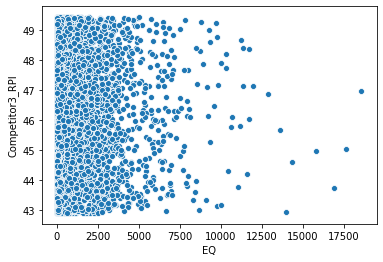

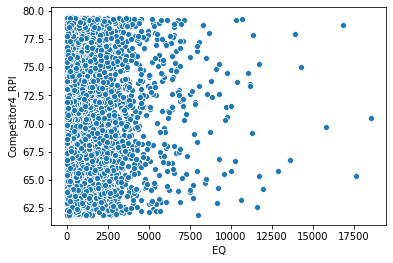

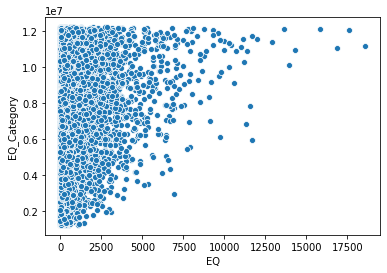

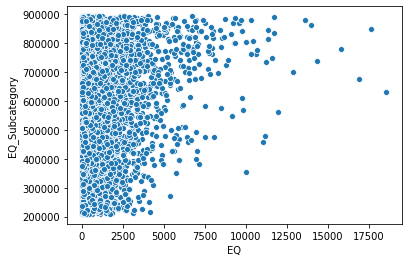

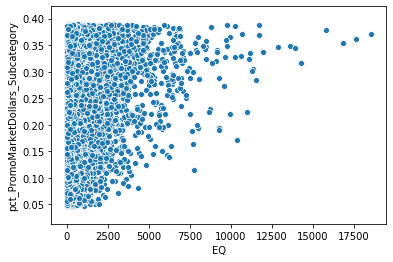

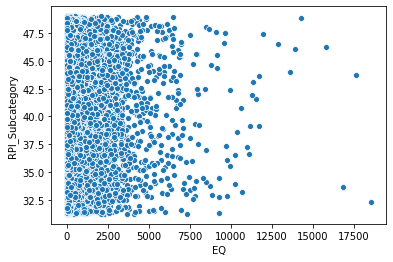

In [14]:
for i in np.arange(2,39):
    sns.scatterplot(x='EQ',y=train.iloc[:,i],data=train)
    plt.show()

>
>
> We can see that there are outliers present in the datasets which are probably affeceting the regression line/curve.
> So lets try to remove outliers which are common in more than one features
>
>

In [15]:
outlier_index = []
features=list(train.columns.values)
    # iterate over features(columns)
for col in features:
        
        # 1st quartile (25%)
    Q1 = np.percentile(train[col], 25)
        
        # 3rd quartile (75%)
    Q3 = np.percentile(train[col],75)
        
        # Interquartile range (IQR)
    IQR = Q3 - Q1
        
        # outlier step
    outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
    outlier_list_col = train[(train[col] < Q1 - outlier_step) | 
                              (train[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
    outlier_index.extend(outlier_list_col)
       
    
print(len(outlier_index))    


train=train.drop(outlier_index,axis=0).reset_index(drop=True)

1306


In [16]:
X=train.iloc[:,2:40]
y=train[["EQ"]]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Model Prediction using Bayesian Ridge

In [18]:
br=BayesianRidge()

model_br=br.fit(X_train,y_train)

y_pred=model_br.predict(X_test)


print('Mean Absolute Perccentage Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean Sqn Perc Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Perccentage Error:  244.02538560731878
Root Mean Squared Error:  111535.78107257302
Root mean Sqn Perc Error:  333.9697307729744


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Prediction using Random Forest Regressor

In [19]:
rf=RandomForestRegressor()

model_rf=rf.fit(X_train,y_train)

y_pred_rf=model_rf.predict(X_test)


print('Mean Absolute Perccentage Error: ', metrics.mean_absolute_error(y_test,y_pred_rf))
print('Root Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred_rf))
print('Root mean Sqn Perc Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean Absolute Perccentage Error:  122.63554786242722
Root Mean Squared Error:  34479.19996210281
Root mean Sqn Perc Error:  185.6857559483301


### Feature importance using XGBOOST

[22:35:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


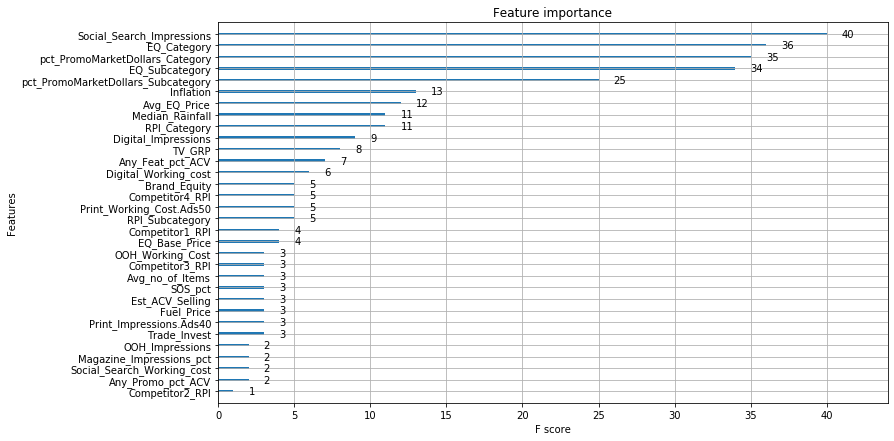

In [20]:
# plot feature importance with xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)


model_xg=xg_reg.fit(X_train,y_train)


plt.rcParams["figure.figsize"] = (12, 7)
plot_importance(model_xg,height=0.2)
plt.show()

## Feature Driving the Output Variable (EQ)

>
>
>
>As we can see in the above graph that 'EQ-Category' , 'Median_Rainfall', 'pct_PromoMarketDollars_subCategory', EQ_Subcategory', 'Inflation' are some of the most important feature driving the EQ value.
>
>
>

## Now lets predict it for the test data set


In [22]:
test=pd.read_excel("Test dataset v1.xlsx",sheet_name="Sheet 1")

In [23]:
test.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,...,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,...,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,...,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,...,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,...,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 39 columns):
Period                                39 non-null object
EQ                                    39 non-null float64
Social_Search_Impressions             39 non-null float64
Social_Search_Working_cost            39 non-null float64
Digital_Impressions                   39 non-null float64
Digital_Working_cost                  39 non-null float64
Print_Impressions.Ads40               39 non-null float64
Print_Working_Cost.Ads50              39 non-null float64
OOH_Impressions                       39 non-null float64
OOH_Working_Cost                      39 non-null float64
SOS_pct                               39 non-null float64
Digital_Impressions_pct               39 non-null float64
CCFOT                                 39 non-null float64
Median_Temp                           39 non-null float64
Median_Rainfall                       39 non-null float64
Fuel_Price                  

In [25]:
# Remove  and copy the in id column
test_period=test["Period"]
test.drop(['Period'],axis=1,inplace=True)


In [26]:
X=test.iloc[:,1:38]
y=test["EQ"]


In [27]:

y_pred_rf_test=model_rf.predict(X)
print('Mean Absolute Perccentage Error: ', metrics.mean_absolute_error(y,y_pred_rf_test))
print('Root Mean Squared Error: ',metrics.mean_squared_error(y,y_pred_rf_test))
print('Root mean Sqn Perc Error: ',np.sqrt(metrics.mean_squared_error(y,y_pred_rf_test)))

Mean Absolute Perccentage Error:  267.54395368969006
Root Mean Squared Error:  86879.45861995549
Root mean Sqn Perc Error:  294.7532164709242


In [28]:
prediction=pd.DataFrame(y_pred_rf_test,columns=['predictions'])
test_period


0      2016 - Period:1
1      2016 - Period:2
2      2016 - Period:3
3      2016 - Period:4
4      2016 - Period:5
5      2016 - Period:6
6      2016 - Period:7
7      2016 - Period:8
8      2016 - Period:9
9     2016 - Period:10
10    2016 - Period:11
11    2016 - Period:12
12    2016 - Period:13
13     2017 - Period:1
14     2017 - Period:2
15     2017 - Period:3
16     2017 - Period:4
17     2017 - Period:5
18     2017 - Period:6
19     2017 - Period:7
20     2017 - Period:8
21     2017 - Period:9
22    2017 - Period:10
23    2017 - Period:11
24    2017 - Period:12
25    2017 - Period:13
26     2018 - Period:1
27     2018 - Period:2
28     2018 - Period:3
29     2018 - Period:4
30     2018 - Period:5
31     2018 - Period:6
32     2018 - Period:7
33     2018 - Period:8
34     2018 - Period:9
35    2018 - Period:10
36    2018 - Period:11
37    2018 - Period:12
38    2018 - Period:13
Name: Period, dtype: object

In [29]:
submission=pd.concat([test_period,prediction],ignore_index=True,axis=1)
submission.columns=['Periods','Predictions']

In [30]:
submission

,Periods,Predictions
0,2016 - Period:1,7.244400
1,2016 - Period:2,56.012458
2,2016 - Period:3,43.864836
3,2016 - Period:4,4.881707
4,2016 - Period:5,6.941703
5,2016 - Period:6,41.892128
6,2016 - Period:7,22.492111
7,2016 - Period:8,42.116008
8,2016 - Period:9,54.855810
9,2016 - Period:10,58.264858


In [38]:
train.columns

Index(['Day', 'EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
       'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
       'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

# forecasting For Next Six Period:

In [133]:
forcast_eq=np.asarray(train['EQ'])
period=6

#  Method: Single Exponential Smoothing:

In [134]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


model = SimpleExpSmoothing(forcast_eq)


# fit model

# alpha values=0

fit_1 = model.fit()
pred_1 = fit_1.forecast(period)


# alpha value=0.2

fit_2 = model.fit(smoothing_level=.2)
pred_2 = fit_2.forecast(period)


# alpha value=0.5

fit_3 = model.fit(smoothing_level=.3)
pred_3 = fit_3.forecast(period)


fit_4 = model.fit(smoothing_level=.4)
pred_4 = fit_4.forecast(period)

In [135]:
last_day=train["Day"].tail(1)
last_day

11999    12000
Name: Day, dtype: int64

In [136]:
last_day=12000
future_period=[]
a=last_day
for i in range(0,period):
    a=a+1
    future_period.append(a)
future_period

[12001, 12002, 12003, 12004, 12005, 12006]

In [129]:
forcasting_df=pd.DataFrame({"future_period":future_period,"0":pred_1,"0.2":pred_2,"0.3":pred_3,"0.4":pred_4})

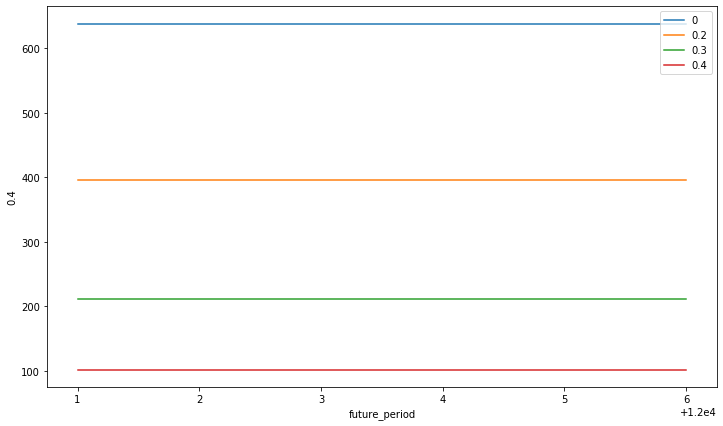

In [144]:
sns.lineplot(data=forcasting_df,x='future_period',y='0')
sns.lineplot(data=forcasting_df,x='future_period',y='0.2')
sns.lineplot(data=forcasting_df,x='future_period',y='0.3')
sns.lineplot(data=forcasting_df,x='future_period',y='0.4')
plt.legend(forcasting_df.columns[1:],loc=1)

In [100]:
pred_3

array([136.39860115, 136.39860115, 136.39860115, 136.39860115,
       136.39860115, 136.39860115])